<a href="https://colab.research.google.com/github/govindaa-sharma/Next-Word-Predictor/blob/main/RNNnextWordPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

url = "https://www.gutenberg.org/files/1342/1342-0.txt"

response = requests.get(url)
text = response.text

In [ ]:
text[:1000]

'*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***\r\n                            [Illustration:\r\n\r\n                             GEORGE ALLEN\r\n                               PUBLISHER\r\n\r\n                        156 CHARING CROSS ROAD\r\n                                LONDON\r\n\r\n                             RUSKIN HOUSE\r\n                                   ]\r\n\r\n                            [Illustration:\r\n\r\n               _Reading Jane’s Letters._      _Chap 34._\r\n                                   ]\r\n\r\n\r\n\r\n\r\n                                PRIDE.\r\n                                  and\r\n                               PREJUDICE\r\n\r\n                                  by\r\n                             Jane Austen,\r\n\r\n                           with a Preface by\r\n                           George Saintsbury\r\n                                  and\r\n                           Illustrations by\r\n                             Hugh Thomson\r\n\r\

In [ ]:
start = text.find('Chapter I.]')
end = text.find('END OF THE PROJECT GUTENBERG EBOOK 1342')
text = text[start:end].lower()

print(f"Number of characters are ass follows: {len(text)}")

Number of characters are ass follows: 708335


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
import numpy as np

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [ ]:
vocab_size

8040

In [ ]:
list(word_index.items())[:10]

[('\r', 1),
 ('to', 2),
 ('the', 3),
 ('of', 4),
 ('and', 5),
 ('her', 6),
 ('a', 7),
 ('in', 8),
 ('was', 9),
 ('i', 10)]

In [ ]:
corpus_words = text.split()

In [ ]:
sequence_length = 50  # max input size

tokens = tokenizer.texts_to_sequences([text])[0]

input_sequences = []
for i in range(sequence_length, len(tokens)):
    seq = tokens[i-sequence_length:i+1]  # last 50 words + next word
    input_sequences.append(seq)

print(f"Total sequences: {len(input_sequences)}")

Total sequences: 129689


In [ ]:
input_sequences = pad_sequences(input_sequences, maxlen=sequence_length+1, padding='pre')

In [ ]:
input_sequences.shape

(129689, 51)

In [ ]:
x = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [ ]:
x.shape

(129689, 50)

In [ ]:
y.shape

(129689,)

In [ ]:
y.shape

(129689,)

In [ ]:
modelRNN = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_length),
    LSTM(150, return_sequences=False),
    Dropout(0.2),
    Dense(vocab_size, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
modelRNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelRNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
historyRNN = modelRNN.fit(x, y, epochs=30, batch_size=256, verbose=1)

Epoch 1/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 205s 399ms/step - accuracy: 0.0375 - loss: 6.9533
Epoch 2/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 257s 389ms/step - accuracy: 0.0787 - loss: 6.1034
Epoch 3/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 199s 392ms/step - accuracy: 0.1110 - loss: 5.7360
Epoch 4/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 198s 390ms/step - accuracy: 0.1231 - loss: 5.5166
Epoch 5/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 205s 396ms/step - accuracy: 0.1376 - loss: 5.3163
Epoch 6/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 201s 394ms/step - accuracy: 0.1464 - loss: 5.1674
Epoch 7/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 201s 392ms/step - accuracy: 0.1551 - loss: 5.0386
Epoch 8/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 198s 390ms/step - accuracy: 0.1610 - loss: 4.9412
Epoch 9/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 200s 395ms/step - accuracy: 0.1654 - loss: 4.8420
Epoch 10/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 200s 392ms/step - accuracy: 0.1716 - loss: 4.7564
Epoch 11/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 202s 392ms/step - accuracy: 0.1761 - loss: 4.6758
Epoch 12

In [ ]:
def generate_text(seed_text, next_words, model, tokenizer, sequence_length):
    for _ in range(next_words):
        # Convert seed text to tokens
        token_list = tokenizer.texts_to_sequences([seed_text])[0]

        # Pad sequence
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')

        # Predict next word index
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)

        # Get the word from index
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                seed_text += " " + word
                break
    return seed_text


In [ ]:
print(generate_text("At that point", 40, modelRNN, tokenizer, sequence_length))

 elizabeth was not to be at the same time to the house and the gentlemen were to her sister and with the room and elizabeth was not to be so much as to the


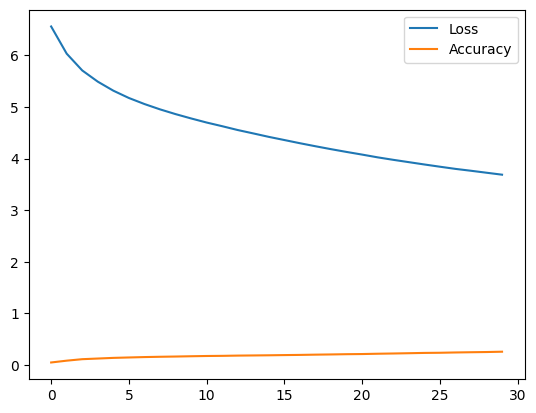

In [ ]:
import matplotlib.pyplot as plt

plt.plot(historyRNN.history['loss'], label='Loss')
plt.plot(historyRNN.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [ ]:
modelRNN.save('rnn_nextword_model.h5')

In [ ]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
from google.colab import files

files.download('rnn_nextword_model.h5')
files.download('tokenizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>